In [1]:
import sys
sys.path.append('../')

from lib.am_utils import *
from lib.mol_functions import *
import lib.consts as c

# from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
pd.set_option('expand_frame_repr', False)


#### The Hamiltonian
\begin{equation}
H=H_\text{rot}+H_\text{hf}+H_\text{S}+H_\text{Z}
\end{equation}
where
\begin{equation}
H_\text{rot} = B_v\mathbf{N}^2-D_v\mathbf{N}^2\mathbf{N}^2
\end{equation}

\begin{equation}
H_\text{hf} = \sum_{i=1}^2\mathbf{V}_i\cdot\mathbf{Q}_i + \sum_{i=1}^2c_i\mathbf{N}\cdot\mathbf{I}_i + c_3\mathbf{I}_i\cdot\mathbf{T}\cdot\mathbf{I}_2+c_4\mathbf{I}_1\cdot\mathbf{I}_2
\end{equation}

\begin{equation}
H_S = -\mathbf{\mu}\cdot\mathbf{E}
\end{equation}

\begin{equation}
H_Z = -g_r\mu_N\mathbf{N}\cdot\mathbf{B} - \sum_{i=1}^2g_i\mu_N\mathbf{I}_i\cdot\mathbf{B}(1-\sigma_i)
\end{equation}

Text(0, 0.5, 'Transition frequency [MHz]')

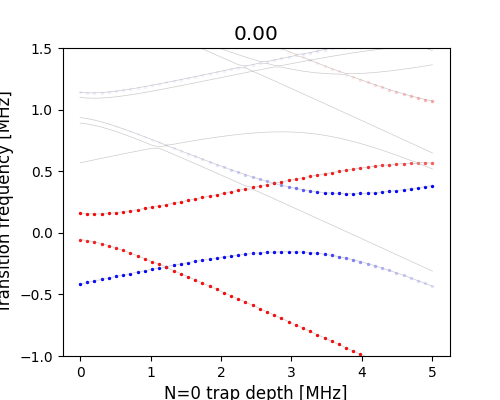

In [3]:
plt.close()
plt.figure(figsize=(5, 4))

chi_scan = np.array([np.deg2rad(0)])
ax = []
for k in range(len(chi_scan)):
    p = p0s['NaRb'].copy()
    p['E_td_00'] = np.linspace(0,5000,50)
    p['B'] = np.linspace(855,855,1)
    chi = chi_scan[k]
    p['trap_pol'] = np.array([[np.cos(chi)],[1j*np.sin(chi)],[0]]) # np.array([[np.sin(chi)],[0],[np.cos(chi)]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',1.5],['n',0],['m_n',0]])

    E_offset = E0[:,0].reshape(len(E0[:,0]),1) # 0 # -2*p['Bv'] # 0 # E0[0,1] # 0 # 

    ax = plt.subplot(1,len(chi_scan),k+1)
    x = p['E_td_00']/1e3 # p['B'] # 
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset[i])/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    plt.ylim(-1,1.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('{x:.2f}'.format(x=chi/np.pi*180))
plt.xlabel('N=0 trap depth [MHz]')
plt.ylabel('Transition frequency [MHz]')

Text(0, 0.5, 'N=1 differential light shift [MHz]')

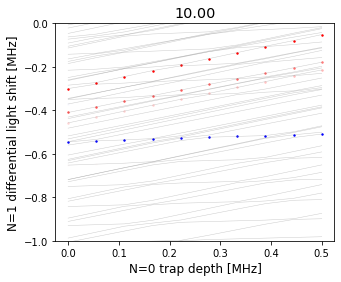

In [73]:
plt.close()
plt.figure(figsize=(5, 4))

chi_scan = np.array([np.deg2rad(10)])
ax = []
for k in range(len(chi_scan)):
    p = p0.copy()
    p['E_td_00'] = np.linspace(0,500,10)
    p['B'] = np.linspace(335,335,1)
    chi = chi_scan[k]
    p['trap_pol'] = np.array([[np.sin(chi)],[0],[np.cos(chi)]]) # np.array([[np.sin(chi)],[0],[np.cos(chi)]])
    H_B,b_uc = H_mol(p)

    E0, Ev0 = calc_eig(H_B)

    dm_val = calc_uwave_vals(E0,Ev0,b_uc,[['m_i1',4],['m_i2',1.5],['n',0],['m_n',0]])

    E_offset = 0 #  E0[0,1] # 0 # 

    ax = plt.subplot(1,len(chi_scan),k+1)
    x = p['E_td_00']/1e3 # p['B'] # 
    ax.plot(x,(E0-2*p['Bv']-E_offset)/1e3,color='gray',linewidth=0.5,alpha=0.4)
    for i,xx in enumerate(x):
        dm_this = np.abs(dm_val[1][i,:])**2 # pi polarization for now
        dm_this = dm_this / np.max(dm_this)
        inds = np.argwhere(np.abs(dm_this) > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_blue(np.abs(dm_this)[j][0]),s=2)
    for i,xx in enumerate(x):
    #     dm_this = dm_val[0][i,:] # sig polarization
        dd = np.abs(dm_val[0][i,:])**2+np.abs(dm_val[2][i,:])**2
        dd = dd / np.max(dd)
        inds = np.argwhere(dd > 0.001)
        for j in inds:
            ax.scatter(xx,(E0[i,j]-2*p['Bv']-E_offset)/1e3,color=color_map_red(np.abs(dd)[j][0]),s=2)        

    # plt.ylim(-2,1)
    plt.ylim(-1,0)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('{x:.2f}'.format(x=chi/np.pi*180))
plt.xlabel('N=0 trap depth [MHz]')
plt.ylabel('N=1 differential light shift [MHz]')

## reproduce dajun wang's PRA 97, 020501 numbers

In [13]:
p = p0.copy()
p['E_td_00'] = np.linspace(100,100,1)
p['B'] = np.linspace(335.2,335.2,1)
p['trap_pol'] = np.array([[0],[0],[1]])
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)

In [11]:
calc_uwave(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',1.5],['n',0],['m_n',0]])

Ev index: 0
     m_i1  m_i2    n  m_n  amps
135   1.5   1.5  0.0  0.0  -1.0
     m_i1  m_i2    n  m_n   mF      sig-        pi      sig+      E [kHz]  rot  v_ind
138   1.5   1.5  1.0  1.0  4.0   0.00000  -0.00000  -0.57735   686.875098 -1.0     21
136   1.5   1.5  1.0  0.0  3.0   0.00000  -0.52724   0.00000     0.000000  0.0     16
137   1.5   1.5  1.0 -1.0  2.0   0.48416   0.00000  -0.00000   267.895219 -1.0     17
120   1.5  -0.5  1.0  1.0  2.0  -0.31123   0.00000   0.00000  1691.970415  1.0     37
129   1.5   0.5  1.0  1.0  3.0   0.00000  -0.21776  -0.00000  1000.408067  1.0     24
102   0.5   1.5  1.0  1.0  3.0   0.00000   0.08905   0.00000  1048.442877  1.0     27
100   0.5   1.5  1.0  0.0  2.0  -0.03716   0.00000  -0.00000   391.950685  0.0     18
127   1.5   0.5  1.0  0.0  2.0   0.02543  -0.00000   0.00000  1251.540285  0.0     29
66   -0.5   1.5  1.0  1.0  2.0   0.00556   0.00000  -0.00000  1414.225498  1.0     34


In [12]:
disp_vec(b_uc, Ev0, 17)

Ev index: 17
     m_i1  m_i2    n  m_n      amps
137   1.5   1.5  1.0 -1.0 -0.838587
120   1.5  -0.5  1.0  1.0  0.430447
127   1.5   0.5  1.0  0.0 -0.323005
100   0.5   1.5  1.0  0.0 -0.076668
93    0.5   0.5  1.0  1.0  0.031228
66   -0.5   1.5  1.0  1.0  0.017349


17

In [6]:
calc_uwave(E0,Ev0,b_uc,17)

Ev index: 17
    m_i1  m_i2    n  m_n      amps
61   1.5   1.5  1.0 -1.0  0.838587
55   1.5  -0.5  1.0  1.0 -0.430447
58   1.5   0.5  1.0  0.0  0.323005
46   0.5   1.5  1.0  0.0  0.076668
43   0.5   0.5  1.0  1.0 -0.031228
31  -0.5   1.5  1.0  1.0 -0.017349
    m_i1  m_i2    n  m_n   mF      sig-        pi      sig+     E [kHz]  rot  v_ind
60   1.5   1.5  0.0  0.0  3.0   0.00000  -0.00000  -0.48416    0.000000  0.0      0
52   1.5  -0.5  0.0  0.0  1.0  -0.24875  -0.00000  -0.00000  918.058049  0.0      5
56   1.5   0.5  0.0  0.0  2.0  -0.00000  -0.19019  -0.00000  459.329001  0.0      2
44   0.5   1.5  0.0  0.0  2.0  -0.00000  -0.02373   0.00000  368.259914  0.0      1
40   0.5   0.5  0.0  0.0  1.0   0.01473  -0.00000  -0.00000  833.940425  0.0      4
28  -0.5   1.5  0.0  0.0  1.0  -0.00968   0.00000  -0.00000  737.328273  0.0      3


In [7]:
disp_vec(b_uc, Ev0, 5)

Ev index: 5
    m_i1  m_i2    n  m_n      amps
52   1.5  -0.5  0.0  0.0 -0.990765
40   0.5   0.5  0.0  0.0 -0.135321


5

## reproduce waseem's numbers

In [8]:
p = p0.copy()
p['E_td_00'] = np.linspace(30,30,1)
p['B'] = np.linspace(60,60,1)
p['trap_pol'] = np.array([[0],[0],[1]])
H_B,b_uc = H_mol(p)

E0, Ev0 = calc_eig(H_B)
calc_uwave(E0,Ev0,b_uc,[['m_i1',1.5],['m_i2',1.5],['n',0],['m_n',0]])

Ev index: 0
    m_i1  m_i2    n  m_n  amps
60   1.5   1.5  0.0  0.0  -1.0
    m_i1  m_i2    n  m_n   mF      sig-        pi      sig+      E [kHz]  rot  v_ind
63   1.5   1.5  1.0  1.0  4.0   0.00000   0.00000  -0.57735   758.224404 -1.0     32
62   1.5   1.5  1.0  0.0  3.0  -0.00000  -0.47046   0.00000     0.000000  0.0     16
61   1.5   1.5  1.0 -1.0  2.0   0.39870   0.00000  -0.00000  1405.475925 -1.0     56
61   1.5   1.5  1.0 -1.0  2.0  -0.32389   0.00000  -0.00000    66.080676 -1.0     17
59   1.5   0.5  1.0  1.0  3.0   0.00000   0.26224   0.00000   779.081638 -1.0     33
46   0.5   1.5  1.0  0.0  2.0  -0.21960   0.00000   0.00000    77.062509  0.0     18
47   0.5   1.5  1.0  1.0  3.0   0.00000  -0.20791  -0.00000   816.177908  1.0     34
58   1.5   0.5  1.0  0.0  2.0  -0.12705  -0.00000  -0.00000   820.837590  0.0     35
31  -0.5   1.5  1.0  1.0  2.0  -0.05524   0.00000  -0.00000   873.866232  1.0     38
31  -0.5   1.5  1.0  1.0  2.0  -0.04528  -0.00000   0.00000   851.027823 -1.

In [9]:
disp_vec(b_uc, Ev0, 56)

Ev index: 56
    m_i1  m_i2    n  m_n      amps
61   1.5   1.5  1.0 -1.0 -0.690571
58   1.5   0.5  1.0  0.0  0.563956
55   1.5  -0.5  1.0  1.0 -0.451071
31  -0.5   1.5  1.0  1.0 -0.030182
46   0.5   1.5  1.0  0.0  0.021656
43   0.5   0.5  1.0  1.0  0.014829


56